In [1]:
from joblib import dump
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv('C:/Users/saiak/Downloads/SDE_PROJECT/dataR2.csv')
df_train.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


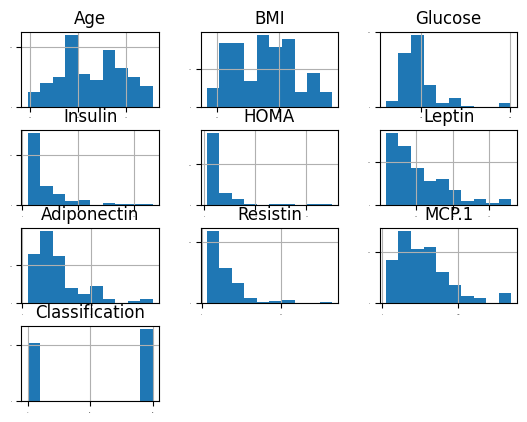

In [5]:
df_train.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [6]:
static_data, stream_data = train_test_split(df_train, test_size=0.2, random_state=42)
stream_data = stream_data.iloc[:, :-1]
stream_data.to_csv('stream_data.csv')
static_data = static_data.reset_index(drop=True)
stream_data = stream_data.reset_index(drop=True)
df_train = static_data

In [7]:
from sklearn.linear_model import LogisticRegression
x, y = df_train.iloc[:, :-1].astype(float), df_train.iloc[:, -1]

In [11]:
# logistic_reg_model = LogisticRegression(solver="lbfgs", max_iter=200)
# logistic_reg_model.fit(x, y)
# dump(logistic_reg_model, './LR_model.joblib')

from sklearn.ensemble import RandomForestClassifier
# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x, y)

# Save the trained model to a file
dump(random_forest_model, './RandomForest_model_3.joblib')

['./RandomForest_model_3.joblib']